In [4]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
os.getcwd()
os.chdir("/Users/zhangjinwei/Desktop/")

In [5]:
data = pd.read_csv("矾花数据完美数据.csv").iloc[:,1:7]
data.head()

,反应池7矾花均一性指标,反应池7矾花平均密度,反应池7矾花平均直径,小颗粒矾花占比,系统实时出水浊度,系统进水浊度
0,4.43,0.63,0.83,0.84,0.24,46.47
1,1.39,0.02,0.28,1.00,0.24,46.47
2,0.60,0.01,0.22,1.00,0.24,46.47
3,1.56,0.01,0.18,1.00,0.24,46.48
4,2.00,0.25,0.55,0.92,0.24,46.48


In [6]:
data.rename(columns={"反应池7矾花均一性指标":"x1",  "反应池7矾花平均密度":"x2",    "反应池7矾花平均直径":"x3",  "系统实时出水浊度":"y"  , "小颗粒矾花占比":"x4"  ,  "系统进水浊度":"x5" },inplace=True)

In [7]:
data.head()

,x1,x2,x3,x4,y,x5
0,4.43,0.63,0.83,0.84,0.24,46.47
1,1.39,0.02,0.28,1.00,0.24,46.47
2,0.60,0.01,0.22,1.00,0.24,46.47
3,1.56,0.01,0.18,1.00,0.24,46.48
4,2.00,0.25,0.55,0.92,0.24,46.48


NameError: name 'pyplot' is not defined

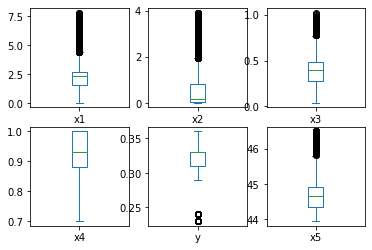

In [8]:
# 箱线图 
data.plot(kind= 'box', subplots=True, layout= (2, 3), sharex=False, sharey=False) 
pyplot.show()

In [20]:
df = pd.read_csv("出生人口数据.csv").loc[1:31,:]
df.head()

,id,name,sh_name,sh_code,fq7_name,fq7_code,fq3_code,fq3_name,year,renkou,E,x1,x2
1,2,天津市,Tianjin,22,Huabei,1,1,Dongbu,2014,12,17,10640.6,28832
2,3,河北省,Hebei,28,Huabei,1,1,Dongbu,2014,97,85,25208.9,16647
3,4,山西省,Shanxi,3,Huabei,1,2,Zhongbu,2014,39,41,12094.7,16538
4,5,内蒙古自治区,Neimenggu,26,Huabei,1,2,Zhongbu,2014,23,28,12158.2,20559
5,6,辽宁省,Liaoning,21,Dongbei,2,1,Dongbu,2014,28,51,20025.7,22820


In [18]:
from plotnine import *

In [52]:
import pyecharts

# 绘制分组柱状图
from pyecharts.charts import Bar 
from pyecharts import options as opts 
from pyecharts.globals import ThemeType 

x = list(df["name"])
y1 = list(df["renkou"])
y2 = list(df["E"])
y3 = list(df["renkou"])
bar = (
    Bar(init_opts=opts.InitOpts (theme= ThemeType.WHITE,          # 可通过 theme= ThemeType.WHITE 更换主题
                                # width="900px", height="500px"    # 可通过此处调整图片大小，也可以删除此处。
                                 )) 
    .add_xaxis(x) 
    .add_yaxis("商家A", y1, gap="2%")  # 此处可以通过 gap="2%" 设置不同柱之间的间距，不需要可以删除。
    .add_yaxis("商家B", y2, gap="2%")  
    .add_yaxis("商家C", y3, gap="2%") 
    .add_yaxis("商家D", y1, gap="2%") 
    .set_global_opts( xaxis_opts=opts.AxisOpts(name = "x轴标签", axislabel_opts=opts.LabelOpts(rotate=65)), # 调整X轴标签的角度，可表示为-35
                      yaxis_opts=opts.AxisOpts(name = "y轴标签"),
                      title_opts=opts.TitleOpts( title ="主标题", subtitle="副标题" ),
                      toolbox_opts=opts.ToolboxOpts(),            # 展示工具箱
                      legend_opts=opts.LegendOpts(is_show=True)  )  # 显示图例
    # 此处开始  ，此处时为了显示最小值，均值，最大值， 如不需要，可删除。
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                opts.MarkPointItem(type_="average", name="平均值"),
            ]
        ),
    )
    #此处截止
    .render_notebook()
)
bar


In [49]:

# 堆叠柱状图
from pyecharts import options as opts
from pyecharts.charts import Bar

x = [ "衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"] 
y1 = [5, 20, 36, 10, 75, 50 ]
y2 = [15, 6, 45, 20, 35, 66 ]
bar = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("商家A", y1, stack="stack1")  # 当 两个均为 stack="stack1" 时，为堆叠柱状图。若不同，则为普通柱状图。
    .add_yaxis("商家B", y2, stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-堆叠数据（全部）"))
)
bar.render_notebook()



In [58]:
# 绘制折线图
from pyecharts.charts import Line 
from pyecharts import options as opts 
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType 
x = list(df["name"])
y1 = list(df["renkou"])
y2 = list(df["E"])
# y3 = list(df["renkou"])
line = (
    Line(init_opts=opts.InitOpts (theme= ThemeType.WHITE)) 
    .add_xaxis(x) 
    .add_yaxis("商家A", y1, is_smooth=True,       # 此处可通过设置 is_smooth=True 使得 线段平滑
               linestyle_opts=opts.LineStyleOpts(  width=2 ),   # 设置线的宽度
               markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min")])  )    # 标记最小值点
    .add_yaxis("商家B", y2, is_smooth=True,       # 此处可通过设置 is_smooth= True 使得 线段平滑
               markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max")])  )   #  标记最大值点
    #.add_yaxis("商家C", y3, is_smooth=False,       # 此处可通过设置 is_smooth= False 使得 线段不平滑
    #           markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]) )    #  均值标记线
    .set_global_opts( xaxis_opts=opts.AxisOpts(name = "x轴标签", axislabel_opts=opts.LabelOpts(rotate=65)), # 调整X轴标签的角度，可表示为-35
                      yaxis_opts=opts.AxisOpts(name = "y轴标签"),
                      title_opts=opts. TitleOpts( title ="主标题", subtitle="副标题" ),
                      toolbox_opts=opts.ToolboxOpts(),            # 展示工具箱
                      legend_opts=opts.LegendOpts(is_show=True))  # 显示图例
)
line.render_notebook()

NameError: name 'Box' is not defined

In [60]:
data

,x1,x2,x3,x4,y,x5
0,4.43,0.63,0.83,0.84,0.24,46.47
1,1.39,0.02,0.28,1.00,0.24,46.47
2,0.60,0.01,0.22,1.00,0.24,46.47
3,1.56,0.01,0.18,1.00,0.24,46.48
4,2.00,0.25,0.55,0.92,0.24,46.48
...,...,...,...,...,...,...
19731,1.22,0.02,0.46,1.00,0.31,44.04
19732,1.15,0.01,0.26,1.00,0.30,44.06
19733,1.15,0.01,0.10,1.00,0.30,44.09
19734,1.15,0.01,0.08,1.00,0.30,44.09
